In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
#%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import hvplot.pandas
import holoviews as hv

In /Users/aguerrero023/opt/anaconda3/envs/pyvizenv2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/aguerrero023/opt/anaconda3/envs/pyvizenv2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/aguerrero023/opt/anaconda3/envs/pyvizenv2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
from os import listdir
from os.path import isfile

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
dir = "../Resources/"

In [5]:
# Read all the files from the resources and put them in a list
all_files = [x for x in listdir(dir) if (".xlsx" in x or ".csv" in x)]
all_files

['corn.xlsx',
 'feeder_cattle.xlsx',
 'live_cattle.xlsx',
 'soybean_meal.xlsx',
 'lean_hogs.xlsx',
 'soybeans.xlsx']

In [6]:
all_df = pd.DataFrame()
for x in all_files:
    a = x.replace(".xlsx", "")
    df = pd.read_excel(dir+x)
    df["name"] = a
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.set_index("Date")
    df = df.sort_index()
    df = df.dropna()
    df = df[df['Volume'] != 0.0]
    df.drop(['Volume'], axis=1, inplace=True)
    if a == "corn":
        corn = df
        all_df["corn"] = corn["Price"]
    elif a == "live_cattle":
        live_cattle = df
        all_df["live_cattle"] = live_cattle["Price"]
    elif a == "feeder_cattle":
        feeder_cattle = df
        all_df["feeder_cattle"] = feeder_cattle["Price"]
    elif a == "soybean_meal":
        soybean_meal = df
        all_df["soybean_meal"] = soybean_meal["Price"]
    elif a == "lean_hogs":
        hog = df
        all_df["hog"] = hog["Price"]

In [7]:
all_df

corn  feeder_cattle  live_cattle  soybean_meal     hog
Date                                                                
2000-12-29  2.6175            NaN          NaN         176.3  47.500
2001-01-02  2.5825         89.875       77.150         176.4  47.800
2001-01-03  2.6100            NaN       76.900         175.2  47.150
2001-01-04  2.6100         89.500       76.650         173.8  48.000
2001-01-05  2.5800         89.500       76.300         171.7  48.000
...            ...            ...          ...           ...     ...
2021-10-28  5.6275        157.650      130.325         330.9  75.200
2021-10-29  5.6825        156.575      129.275         332.6  76.075
2021-11-01  5.7900        154.400      128.850         329.1  76.150
2021-11-02  5.7300        157.575      129.950         337.2  74.250
2021-11-03  5.6400        159.175      131.650         340.8  75.950

[5239 rows x 5 columns]

In [8]:
lh_df = all_df.drop(columns=["feeder_cattle", "live_cattle"])
lh_df.dropna(inplace=True)

In [9]:
lh_df['crush'] = lh_df['hog']*400*8 - (lh_df['corn']*5000*3 + lh_df['soybean_meal']*100)
lh_df

corn  soybean_meal     hog     crush
Date                                              
2000-12-29  2.6175         176.3  47.500   95107.5
2001-01-02  2.5825         176.4  47.800   96582.5
2001-01-03  2.6100         175.2  47.150   94210.0
2001-01-04  2.6100         173.8  48.000   97070.0
2001-01-05  2.5800         171.7  48.000   97730.0
...            ...           ...     ...       ...
2021-10-28  5.6275         330.9  75.200  123137.5
2021-10-29  5.6825         332.6  76.075  124942.5
2021-11-01  5.7900         329.1  76.150  123920.0
2021-11-02  5.7300         337.2  74.250  117930.0
2021-11-03  5.6400         340.8  75.950  124360.0

[5186 rows x 4 columns]

In [10]:
lh_df.hvplot(x='Date', y='crush')

:Curve   [Date]   (crush)

In [11]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
#lh_df['corn_scaled'] = scaler.fit(lh_df['corn'])

lh_df_std_scaled = std_scaler.fit_transform(lh_df.to_numpy())
lh_df_std_scaled = pd.DataFrame(lh_df_std_scaled, columns = ['crush', 'hog', 'soybean_meal', 'corn'])

lh_df_std_scaled.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [12]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = StandardScaler()
#lh_df['corn_scaled'] = scaler.fit(lh_df['corn'])

lh_df_mm_scaled = mm_scaler.fit_transform(lh_df.to_numpy())
lh_df_mm_scaled = pd.DataFrame(lh_df_mm_scaled, columns = ['crush', 'hog', 'soybean_meal', 'corn'])

lh_df_mm_scaled.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [13]:
lh_df_adj = lh_df.copy()
lh_df_adj['corn'] = lh_df['corn']*5000
lh_df_adj['soybean_meal'] = lh_df['soybean_meal']*100
lh_df_adj['hog'] = lh_df['hog']*400

lh_df_adj

corn  soybean_meal      hog     crush
Date                                                
2000-12-29  13087.5       17630.0  19000.0   95107.5
2001-01-02  12912.5       17640.0  19120.0   96582.5
2001-01-03  13050.0       17520.0  18860.0   94210.0
2001-01-04  13050.0       17380.0  19200.0   97070.0
2001-01-05  12900.0       17170.0  19200.0   97730.0
...             ...           ...      ...       ...
2021-10-28  28137.5       33090.0  30080.0  123137.5
2021-10-29  28412.5       33260.0  30430.0  124942.5
2021-11-01  28950.0       32910.0  30460.0  123920.0
2021-11-02  28650.0       33720.0  29700.0  117930.0
2021-11-03  28200.0       34080.0  30380.0  124360.0

[5186 rows x 4 columns]

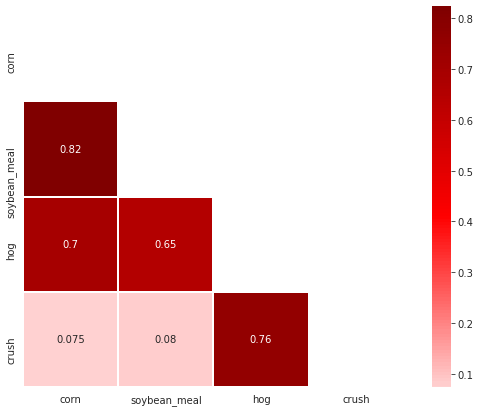

In [14]:
corrM = lh_df_adj.corr()

mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(corrM, mask=mask, center=0, annot=True, square=True, linewidths=1, cmap="seismic")

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
# OLS
lr_features = lh_df_adj.drop(axis=1, columns=["crush", "hog"])
lr_model = LinearRegression()

X = lr_features
y = (lh_df_adj['hog']*8).to_frame()
lr_model.fit(X, y)
test = X

predictions = lr_model.predict(X)
predictions

# Calculate r2_score (r-squared)
r2 = r2_score(y, predictions)

# Calculate mean squared error 
mse = mean_squared_error(y, predictions)

# Using mean squared error above, calculate root-mean-squared error (RMSE)
rmse = np.sqrt(mse)

# Print the r2, mser, rmse, and standard deviation
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

# with statsmodels print detailed reults

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

R-squared (R2 ): 0.5074272220823359
Mean Squared Error (MSE): 820644247.0670722
Root Mean Squared Error (RMSE): 28646.88895965969
Standard Deviation: hog    40817.110884
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    hog   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     2670.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:42:48   Log-Likelihood:                -60581.
No. Observations:                5186   AIC:                         1.212e+05
Df Residuals:                    5183   BIC:                         1.212e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef  

In [16]:
lh_df_adj_totals = lh_df_adj.copy()
lh_df_adj_totals['corn'] = lh_df_adj_totals['corn']*3
lh_df_adj_totals['hog'] = lh_df_adj_totals['hog']*8
lh_df_adj_totals['soybean_meal'] = lh_df_adj_totals['soybean_meal']*1
lh_df_adj_totals['corn + soybean_meal'] = lh_df_adj_totals['corn'] + lh_df_adj_totals['soybean_meal']
lh_df_adj_totals

corn  soybean_meal       hog     crush  corn + soybean_meal
Date                                                                      
2000-12-29  39262.5       17630.0  152000.0   95107.5              56892.5
2001-01-02  38737.5       17640.0  152960.0   96582.5              56377.5
2001-01-03  39150.0       17520.0  150880.0   94210.0              56670.0
2001-01-04  39150.0       17380.0  153600.0   97070.0              56530.0
2001-01-05  38700.0       17170.0  153600.0   97730.0              55870.0
...             ...           ...       ...       ...                  ...
2021-10-28  84412.5       33090.0  240640.0  123137.5             117502.5
2021-10-29  85237.5       33260.0  243440.0  124942.5             118497.5
2021-11-01  86850.0       32910.0  243680.0  123920.0             119760.0
2021-11-02  85950.0       33720.0  237600.0  117930.0             119670.0
2021-11-03  84600.0       34080.0  243040.0  124360.0             118680.0

[5186 rows x 5 columns]

In [17]:
lh_df_adj_totals.hvplot(x='Date', y=['hog', 'corn + soybean_meal'])

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [18]:
mean_line = hv.HLine(lh_df['crush'].mean())
mean_line.opts(color = 'black', line_dash = 'dashed', line_width=2.0)
plot = lh_df.hvplot(x='Date', y='crush', yformatter='%.0f')
plot * mean_line

:Overlay
   .Curve.I :Curve   [Date]   (crush)
   .HLine.I :HLine   [x,y]

In [19]:
# Plot z-scores of the ratio

def zscore(series):
    return (series - series.mean()) / np.std(series)

lh_df['Z-Score'] = zscore(lh_df['crush'])

zscore_plot = lh_df.hvplot(x='Date', y=['Z-Score'])
z_zero_line = hv.HLine(0)
z_zero_line.opts(color = 'black', line_dash = 'dashed', line_width=2.0)
z_plus_one = hv.HLine(1)
z_plus_one.opts(color = 'orange', line_dash = 'dashed', line_width=2.0)
z_minus_one = hv.HLine(-1)
z_minus_one.opts(color = 'green', line_dash = 'dashed', line_width=2.0)
z_plus_two = hv.HLine(2)
z_plus_two.opts(color = 'red', line_dash = 'dashed', line_width=2.0)
z_minus_two = hv.HLine(-2)
z_minus_two.opts(color = 'purple', line_dash = 'dashed', line_width=2.0)

zscore_plot * z_zero_line * z_plus_one * z_minus_one * z_plus_two * z_minus_two

:Overlay
   .Curve.I   :Curve   [Date]   (Z-Score)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]
   .HLine.IV  :HLine   [x,y]
   .HLine.V   :HLine   [x,y]

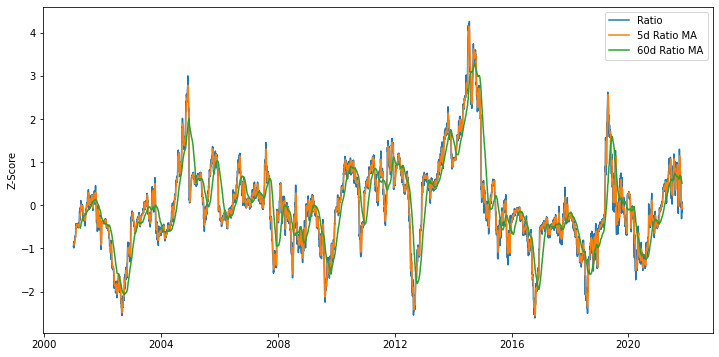

In [20]:
# Feature Engineering for training
train = lh_df.copy()
feature_train = train['Z-Score']

ratios_mavg5 = feature_train.rolling(window=5, center=False).mean()
ratios_mavg60 = feature_train.rolling(window=60, center=False).mean()
std_60 = feature_train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(feature_train.index, feature_train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Z-Score')
    
plt.show()

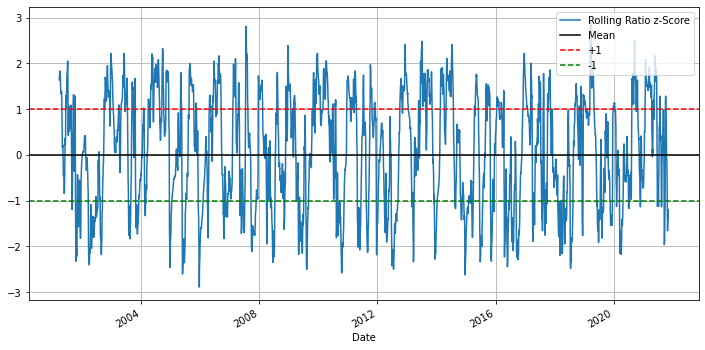

In [21]:
plt.figure(figsize=(12,6))
zscore_60_5.plot(grid=True)
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

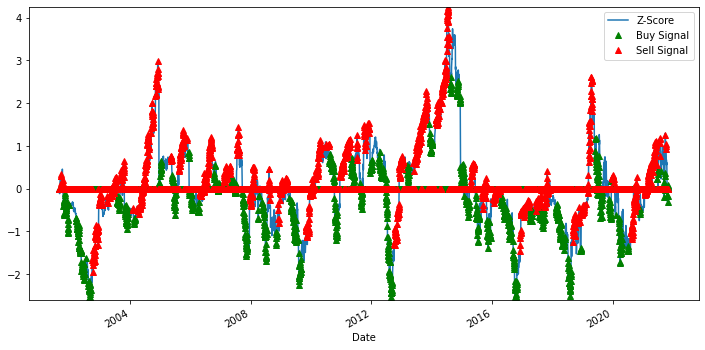

In [22]:
plt.figure(figsize=(12,6))

feature_train[160:].plot()
buy = feature_train.copy()
sell = feature_train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[160:].plot(color='g', linestyle='None', marker='^')
sell[160:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, train['Z-Score'].min(), train['Z-Score'].max()))
plt.legend(['Z-Score', 'Buy Signal', 'Sell Signal'])
plt.show()

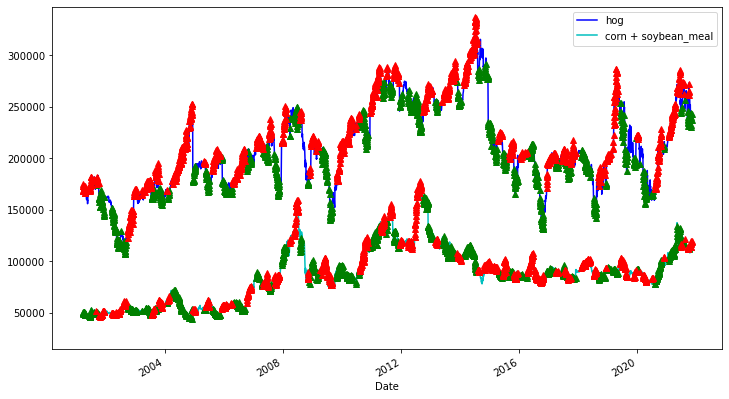

In [23]:
plt.figure(figsize=(12,7))
S1 = lh_df_adj_totals['hog']
S2 = lh_df_adj_totals['corn + soybean_meal']

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy x and sell y
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell x and buy y
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min())-30000, max(S1.max(), S2.max())+10000))

plt.legend(['hog', 'corn + soybean_meal'])
plt.show()

In [24]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    
    # intiliazae trading results dataframe
    trading_results = pd.DataFrame(index=S1.index, columns=['equity', 'ratios', 'countS1', 'countS2'])
    
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            trading_results['equity'][i] = money
            trading_results['ratios'][i] = ratios[i]
            trading_results['countS1'][i] = countS1
            trading_results['countS2'][i] = countS2
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            trading_results['equity'][i] = money
            trading_results['ratios'][i] = ratios[i]
            trading_results['countS1'][i] = countS1
            trading_results['countS2'][i] = countS2
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            trading_results['equity'][i] = money
            trading_results['ratios'][i] = ratios[i]
            trading_results['countS1'][i] = countS1
            trading_results['countS2'][i] = countS2
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money, trading_results

In [25]:
# Run the trading similuation and visualize the equity curve

train_total_equity, train_trading_results = trade(lh_df_adj_totals['hog'], lh_df_adj_totals['corn + soybean_meal'], 60, 5)
train_trading_results_plot = train_trading_results.dropna().hvplot(x='Date', y=['equity'], yformatter='%.0f')
train_trading_results_plot

:Curve   [Date]   (equity)